# 模擬3大類訊號,用以實作MLP分類系統的公版程式。

In [5]:
#import Library
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from keras.backend import sparse_categorical_crossentropy
import random

In [3]:
#中文化設定#只須執行一次
#需刪除C:\Users\<自己的user名稱>\.matplotlib\fontlist-v330.json才執行下段
#下段用意是使之唯一駐列台北思源體
from matplotlib.font_manager import fontManager
fontManager.addfont('D:/EMG_IRB_Data_For_CNN_Github/Fonts/TaipeiSansTCBeta-Light.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

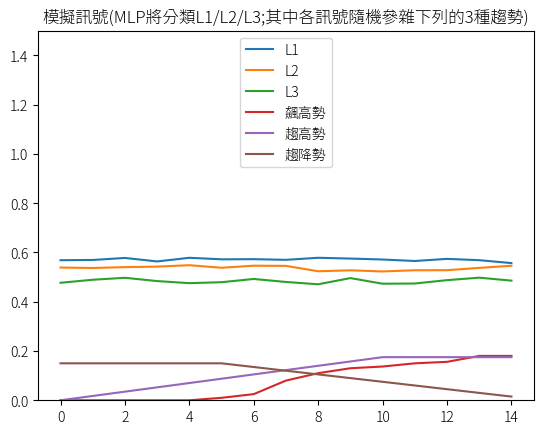

In [4]:
#設置15個點0.5~0.7之間的隨機值 10組

#X1不可用,因為不知為何訊號特別陡峭
X1 = np.random.rand(15)
X1 = np.interp(X1,(0,1),(0.6,0.62))#映射法


#設置15個點0.2~0.4之間的隨機值 10組
X11 = np.random.rand(15)
X11 = np.interp(X11,(0,1),(0.55,0.58))

#設置15個點0.3~0.6之間的隨機值 10組
X22 = np.random.rand(15)
X22 = np.interp(X22,(0,1),(0.52,0.55))

#設置15個點0.2~0.4之間的隨機值 10組
X33 = np.random.rand(15)
X33 = np.interp(X33,(0,1),(0.47,0.5))

#print(X11)
#print(X22)
#print(X33)

#飆高勢
arr1List=[]
arr1List.append(0)
arr1List.append(0)
arr1List.append(0)
arr1List.append(0)
arr1List.append(0)
arr1List.append(0.01)
arr1List.append(0.025)
arr1List.append(0.08)
arr1List.append(0.11)
arr1List.append(0.13)
arr1List.append(0.137)
arr1List.append(0.15)
arr1List.append(0.156)
arr1List.append(0.18)
arr1List.append(0.18)
arr1 = np.array(arr1List)
#print('飆高勢=',arr1)

#趨高勢
arr2=np.arange(0, 15)*0.1
arr2 = np.interp(arr2,(0,1),(0,0.175))
#print('趨高勢=',arr2)

#趨降勢
arr3 = np.arange(15, 0, -1)*0.1
arr3 = np.interp(arr3,(0,1),(0,0.15))
#print('趨降勢=',arr3)

#突斷勢(太特殊,棄用)
arr4List=[]
arr4List.append(0)
arr4List.append(0)
arr4List.append(-0.03)
arr4List.append(-0.06)
arr4List.append(-0.1)
arr4List.append(-0.02)
arr4List.append(-0.01)
arr4List.append(0)
arr4List.append(0)
arr4List.append(0)
arr4List.append(0)
arr4List.append(0)
arr4List.append(0)
arr4List.append(0)
arr4List.append(0)
arr4 = np.array(arr4List)

#視覺化波形觀測
ll='模擬訊號(MLP將分類L1/L2/L3;其中各訊號隨機參雜下列的3種趨勢)'
plt.title(ll)
plt.plot(X11,label='L1')
plt.plot(X22,label='L2')
plt.plot(X33,label='L3')
plt.plot(arr1,label='飆高勢')
plt.plot(arr2,label='趨高勢')
plt.plot(arr3,label='趨降勢')
#plt.plot((arr4+0.2),label='突斷勢')#(太特殊,棄用)
plt.axis('on')
plt.legend(loc='upper center')
plt.ylim(0,1.5)
    
plt.show()

x_train維度: (600, 15)
y_train維度: (600,)


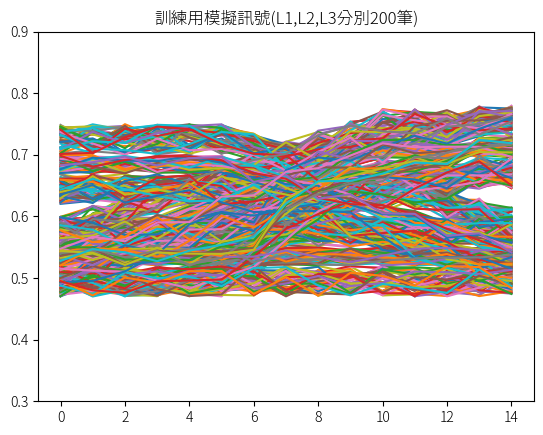

In [486]:
#根據上述波形隨機生成L1組/L2組/L3組 各200組 共600組訓練數據
X_TrainData=[]
Y_TrainData=[]
flagX11=0
flagX22=0
flagX33=0

count=200 #每個Level的樣本數

while ((flagX11<count)or(flagX22<count)or(flagX33<count)):
    temp1=random.randrange(1, 4)
    temp2=random.randrange(1, 5)
    if(temp1==1):
        if(flagX11<count):
            X11 = np.random.rand(15)
            X1 = np.interp(X11,(0,1),(0.55,0.6))
            if(temp2==1):
                X_TrainData.append((X1+arr1).tolist()) 
            elif(temp2==2):
                X_TrainData.append((X1+arr2).tolist()) 
            elif(temp2==3):
                X_TrainData.append((X1+arr3).tolist())
            elif(temp2==4):
                X_TrainData.append((X1).tolist())
            flagX11=flagX11+1
            Y_TrainData.append(2)
    elif(temp1==2):
        if(flagX22<count):
            X22 = np.random.rand(15)
            X2 = np.interp(X22,(0,1),(0.52,0.55))
            if(temp2==1):
                X_TrainData.append((X2+arr1).tolist())
            elif(temp2==2):
                X_TrainData.append((X2+arr2).tolist())
            elif(temp2==3):
                X_TrainData.append((X2+arr3).tolist())
            elif(temp2==4):
                X_TrainData.append((X2).tolist())
            flagX22=flagX22+1
            Y_TrainData.append(1)
    elif(temp1==3):
        if(flagX33<count):
            X33 = np.random.rand(15)
            X3 = np.interp(X33,(0,1),(0.47,0.52))
            if(temp2==1):
                X_TrainData.append((X3+arr1).tolist())
            elif(temp2==2):
                X_TrainData.append((X3+arr2).tolist())
            elif(temp2==3):
                X_TrainData.append((X3+arr3).tolist())
            elif(temp2==4):
                X_TrainData.append((X3).tolist())
            flagX33=flagX33+1
            Y_TrainData.append(0)

x_train = np.array(X_TrainData)
print('x_train維度:',x_train.shape)
y_train = np.array(Y_TrainData)
print('y_train維度:',y_train.shape)

#視覺化波形觀測
ll='訓練用模擬訊號(L1,L2,L3分別200筆)'
plt.title(ll)
for i in range(0,len(x_train),1):
    plt.plot(x_train[i])
plt.axis('on')
#plt.legend(loc='upper center')
plt.ylim(0.3,0.9)
    
plt.show()


x_test維度: (90, 15)
y_test維度: (90,)


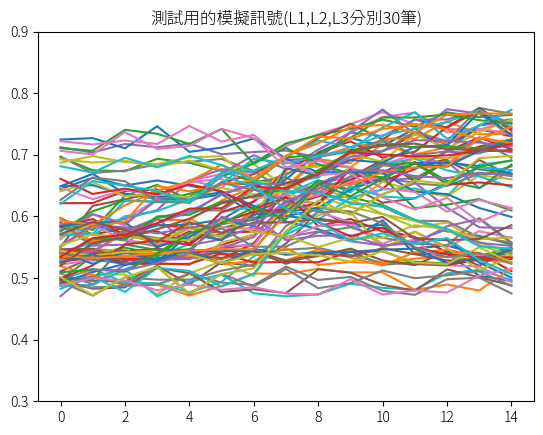

In [487]:
#同上述方法隨機生成L1組/L2組/L3組 各30組 共90組測試用數據
X_TestData=[]
Y_TestData=[]
flagX11=0
flagX22=0
flagX33=0
count=30 #每個Level的樣本數

while ((flagX11<count)or(flagX22<count)or(flagX33<count)):
    temp1=random.randrange(1, 4)
    temp2=random.randrange(1, 5)
    if(temp1==1):
        if(flagX11<count):
            X11 = np.random.rand(15)
            X1 = np.interp(X11,(0,1),(0.55,0.6))
            if(temp2==1):
                X_TestData.append((X1+arr1).tolist()) 
            elif(temp2==2):
                X_TestData.append((X1+arr2).tolist()) 
            elif(temp2==3):
                X_TestData.append((X1+arr3).tolist())
            elif(temp2==4):
                X_TestData.append((X1).tolist())
            flagX11=flagX11+1
            Y_TestData.append(2)
    elif(temp1==2):
        if(flagX22<count):
            X22 = np.random.rand(15)
            X2 = np.interp(X22,(0,1),(0.52,0.55))
            if(temp2==1):
                X_TestData.append((X2+arr1).tolist())
            elif(temp2==2):
                X_TestData.append((X2+arr2).tolist())
            elif(temp2==3):
                X_TestData.append((X2+arr3).tolist())
            elif(temp2==4):
                X_TestData.append((X2).tolist())
            flagX22=flagX22+1
            Y_TestData.append(1)
    elif(temp1==3):
        if(flagX33<count):
            X33 = np.random.rand(15)
            X3 = np.interp(X33,(0,1),(0.47,0.52))
            if(temp2==1):
                X_TestData.append((X3+arr1).tolist())
            elif(temp2==2):
                X_TestData.append((X3+arr2).tolist())
            elif(temp2==3):
                X_TestData.append((X3+arr3).tolist())
            elif(temp2==4):
                X_TestData.append((X3).tolist())
            flagX33=flagX33+1
            Y_TestData.append(0)

x_test = np.array(X_TestData)
print('x_test維度:',x_test.shape)
y_test = np.array(Y_TestData)
print('y_test維度:',y_test.shape)

#視覺化波形觀測
ll='測試用的模擬訊號(L1,L2,L3分別30筆)'
plt.title(ll)
for i in range(0,len(x_test),1):
    plt.plot(x_test[i])
plt.axis('on')
#plt.legend(loc='upper center')
plt.ylim(0.3,0.9)
    
plt.show()

In [498]:
# 定義MLP模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [499]:
# 訓練模型3000次
model_history = model.fit(x_train, y_train, epochs=3000)

Epoch 1/3000
19/19 [==============================] - 0s 929us/step - loss: 1.1074 - accuracy: 0.3400
Epoch 2/3000
19/19 [==============================] - 0s 997us/step - loss: 1.0989 - accuracy: 0.3317
Epoch 3/3000
19/19 [==============================] - 0s 886us/step - loss: 1.0979 - accuracy: 0.3383
Epoch 4/3000
19/19 [==============================] - 0s 833us/step - loss: 1.0971 - accuracy: 0.3333
Epoch 5/3000
19/19 [==============================] - 0s 997us/step - loss: 1.0944 - accuracy: 0.3333
Epoch 6/3000
19/19 [==============================] - 0s 832us/step - loss: 1.0969 - accuracy: 0.3250
Epoch 7/3000
19/19 [==============================] - 0s 948us/step - loss: 1.0946 - accuracy: 0.3333
Epoch 8/3000
19/19 [==============================] - 0s 886us/step - loss: 1.0921 - accuracy: 0.4117
Epoch 9/3000
19/19 [==============================] - 0s 825us/step - loss: 1.0939 - accuracy: 0.4133
Epoch 10/3000
19/19 [==============================] - 0s 2ms/step - loss: 1.0922 

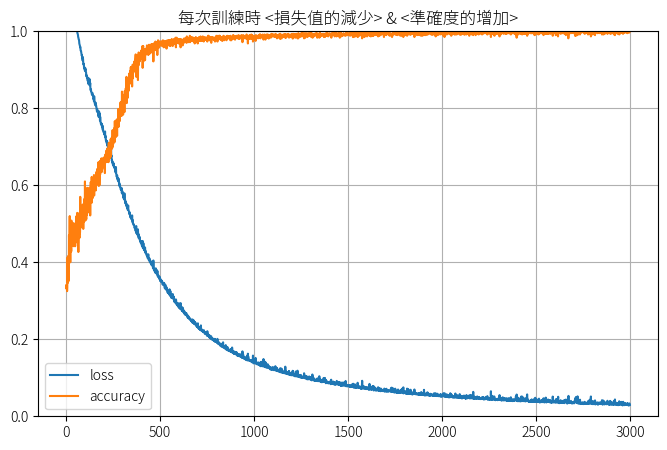

In [500]:
def plot_learning_curves(history):
  
  pd.DataFrame(history.history).plot(figsize=(8,5))
  ll='每次訓練時 <損失值的減少> & <準確度的增加>'
  plt.title(ll)
  plt.grid(True)
  plt.gca().set_ylim(0,3)
  plt.ylim(0,1)
  plt.show()

plot_learning_curves(model_history)

In [501]:
# 利用測試數據去評估訓練後的模型
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9778


[0.06572743505239487, 0.9777777791023254]